In [3]:
import pandas as pd 
import random
import numpy as np 
from numpy.random import exponential
from scipy.stats import expon

source_df = pd.read_csv('../make_source_label_hierarchy/similarity_training_data/full-source-df-with-clusters.csv')
cluster_centers = np.load('../make_source_label_hierarchy/models/kmeans-embs-output.txt')
child_node_summaries = pd.read_csv('cache/child-node-summaries.txt')['0']

<Axes: >

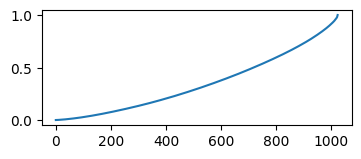

In [12]:
source_df['clusters'].value_counts().sort_values().cumsum().pipe(lambda s: s /s.max()).reset_index(drop=True).plot(figsize=(4,1.5))

In [13]:
(
    source_df['clusters'].value_counts().sort_values()
         .to_frame('counts')
         .merge(child_node_summaries.to_frame('summary'), right_index=True, left_index=True)
         .head()
)

,counts,summary
382,10,"""Expert Opinion"": This group of sources compri..."
990,19,"""Subject"": This source is the subject of the a..."
301,54,"""Veterans Day Offers and Holiday Promotions"": ..."
177,54,"""Problem Illustration"": This collection of sou..."
756,59,"""Weather Forecasts and Reports"": These sources..."


In [18]:
# ! pip install hdbscan
# ! pip install fast_hdbscan

In [72]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusterer.fit(cluster_centers)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=10)

<Axes: ylabel='$\\lambda$ value'>

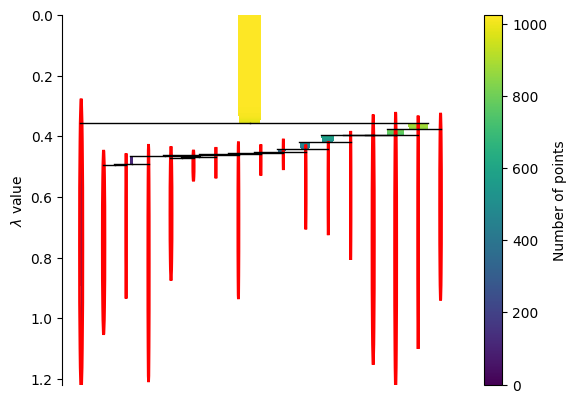

In [73]:
import seaborn as sns
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

In [39]:
import fast_hdbscan
from sklearn.datasets import make_blobs

In [63]:
clusterer = fast_hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(
    cluster_centers, 
    sample_weight=source_df['clusters'].value_counts().pipe(lambda s: s/s.max()).sort_index().tolist()
)

In [64]:
pd.Series(cluster_labels).value_counts()

0    947
1     77
Name: count, dtype: int64

<Axes: ylabel='$\\lambda$ value'>

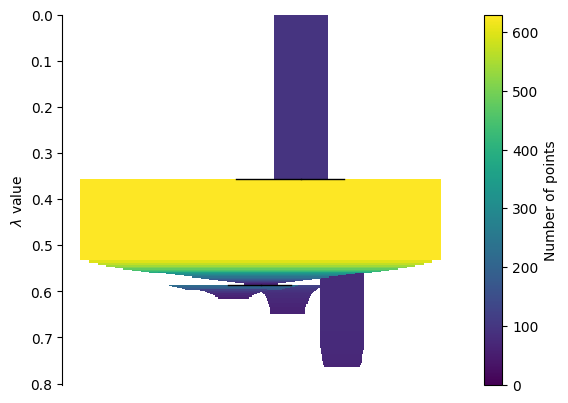

In [67]:
clusterer.condensed_tree_.plot()#select_clusters=True, selection_palette=sns.color_palette('deep', 8))

# Agglomerative Clustering

In [76]:
original_embeddings = np.loadtxt('../make_source_label_hierarchy/similarity_training_data/custom-embs.txt')

In [78]:
original_embeddings

(35903, 768)

In [83]:
ls ../make_source_label_hierarchy/similarity_training_data/

batch-processed-openai-labeled-data.csv.gz
custom-embs.txt
full-source-df-with-clusters.csv
source-df-to-label.csv
source-triplets.jsonl.gz


In [ ]:
clusterer = fast_hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(original_embeddings)

In [ ]:
cluster_labels

In [ ]:
clusterer.condensed_tree_.plot()